# Постановка задачи

Фермеру принадлежит стадо численностью $k$ голов. В начале каждого года фермер принимает решение, сколько животных продать, а сколько оставить. Доход от продажи одного животного составляет $с$; затраты на его содержание в течение года - $b$; к началу следующего года количество оставленных животных увеличивается в $a$ раз. На каждом этапе можно продавать и оставлять любое число животных в пределах текущего поголовья стада.

Фермера интересует получение максимума прибыли за 3-хлетний цикл, т.е. по результатам продажи в начале 4-го года.
Присутствует зависимость цены с от количества продаваемых животных, т.е. моделируется нелинейность типа насыщения рынка; также учитывается экстремальный характер (наличие минимума) для зависимости $b(y)$ затрат $b$ на содержание $y$ оставшихся животных.

| $a$ | $b(y)$                 | $c(x)$             | K  |
|-----|------------------------|--------------------|----|
| 2   | $9+(\frac{y-5}{20})^2$ |  $17-\ln(6+0.5x)$  | 10 |

# Шаг 1

Итак, в задаче явным образом задана периодизация процесса принятия решений: есть три точки принятия решений, соответствующих началам 1го, 2го и 3го годов. В начале 4го года все оставшиеся животные продаются.
При анализе условия задачи необходимо выделить три составляющие, обязательные при решении задачи методом динамического программирования: выигрыш, управление и состояние.

Выигрыш в данной задаче соответствует доходу, получаемому от продажи животных, за вычетом
расходов по содержанию оставшихся.

Управление – это решение о том, сколько животных в данной точке принятия решение следует
продать. Поскольку все стадо в каждой точке принятия решения делится на две
непересекающиеся группы – продаваемые животные и остающиеся животные – вводить
отдельную переменную управления для остающихся животных нет смысла. Обозначим
единственную переменную, задающую управление, через x. Для различения управлений на
разных этапах будем использовать нижнюю индексацию, например, $x_1$ соответствует управлению
на первом этапе, то есть, количеству коров, которые фермер продает в начале первого года.

Состояние. В каждой точке принятия решения управляемая система описывается одним
параметром – количеством животных, это и будет состояние системы k. По аналогии с
управлением, для различения состояний, используемых на разных этапах, будем использовать
нижнюю индексацию: $k_1$, …, $k_4$.

# Шаг 2: Записать выигрыш на i-том этапе в зависимости от состояния и управления

Для лучшего понимания проблемной области построим графики заданных в условии задачи
зависимостей дохода от продажи животного и расходов на содержание в зависимости от
количества. Зададим соответствующие функции:


In [2]:
import numpy as np

# Доход от продажи одного животного в зависимости от количества выставленных на продажу
def c(x):
    return 17 - np.log(6 + 0.5*x);

# Расходы на содержание одного животного в зависимости от размера стада
def b(y):
    return 9 + np.power(1/20*(y - 5), 2);


Мы используем функции библиотеки Numpy `numpy.log()` и `numpy.power()`, обеспечивающие
возможность т.н. векторизованного применения функции, то есть применения ее к 
каждому значению из массива (`numpy.array`). Это позволяет передавать в созданные
функции как одно число (значение аргумента), так и целый вектор значений. Во втором случае
функция будет вычислена для каждого значения, содержащегося в векторе. Этой возможностью
удобно будет пользоваться, например, при построении графиков.

In [6]:
# Пример вычисления дохода от продажи одного животного, если на продажу выставлено 10:
c(10)

14.60210472720163

In [12]:
# Пример вычисления дохода от продажи одного животного, если на продажу выставлено от 
# 0 до 10 животных:
c(np.array(range(11)))

array([15.20824053, 15.12819782, 15.05408985, 14.98509698, 14.92055846,
       14.85993384, 14.80277542, 14.7487082 , 14.69741491, 14.64862474,
       14.60210473])

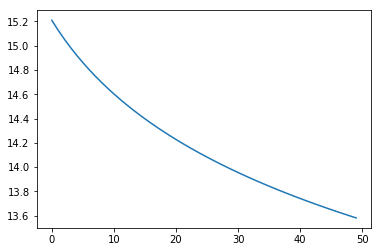

In [6]:
# Построение графиков

import seaborn as sns              # высокоуровневая библиотека для построения графиков
import matplotlib.pyplot as plt    # pyplot используется для настройки внешнего вида графиков

# Чтобы графики сразу отображались в блокноте
%matplotlib inline

# Зададим массив точек (в данном случае, это размеры стада), для которых
# будем строить график
x = np.array(range(0, 50))
# Вычислим значение функции для каждой из точек (воспользовавшись тем 
# фактом, что функция `c(x)` векторизована)
y = c(x)
sns.lineplot(x, y)


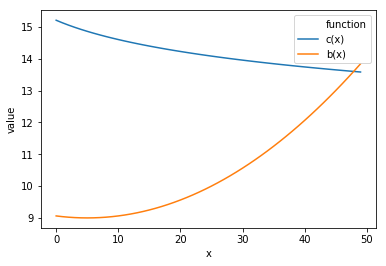

In [10]:

# Отобразим на графике одновременно затраты на содержание животного и цену его
# продажи

# При работе с seaborn это проще всего сделать, подготовив специальную структуру вида:
#  x | function | function
# ----------------------
#  1 |  b(x)   |   ???
#  1 |  c(x)   |   ???
#  2 |  b(x)   |   ???
#  2 |  c(x)   |   ???

# Для этого просто создадим `DataFrame` 

import pandas as pd

x = np.array(range(0, 50))
plot_df = pd.DataFrame({'x': x,
                        'c(x)': c(x),
                        'b(x)': b(x)})
# ... и преобразуем его в нужный вид функцией `pandas.melt`:
melted_plot_df = pd.melt(plot_df, id_vars=['x'], value_vars=['c(x)', 'b(x)'], var_name='function')
# ...из такого набора данных `seaborn.lineplot` сам умеет выбирать
# данные, относящиеся к одному виду (в данном случае, функции) и 
# отображать их разным цветом  
sns.lineplot(data=melted_plot_df, x='x', y='value', hue='function')


На рисунке видно, что при повышении размера стада расходы на содержание одного животного
становятся слишком большими. В частности, при размере стада около 50 они начинают превышать
возможный доход от продаж животных, даже «одиночных».
Перейдем собственно к построению функции выигрыша. На предыдущем шаге мы определили,
что выигрыш в данной задаче определяется доходом, получаемым от реализации животных за
вычетом стоимости содержания оставшихся. Функции для определения дохода от продажи
одного животного и расходов на его содержание заданы в условии, таким
образом, выигрыш на i-том шаге определяется по следующей формуле:

$$
w_i(k_i, x_i) = x_i\left(17 - \ln(6 + 0.5x_i)\right) 
- \frac{(k_i-x_i) + 2(k_i - x_i)}{2} \left( 9 + \left(\frac{(k_i - x_i) - 5}{20}\right)^2  \right)
$$

В этой формуле при вычислении затрат на содержание берется среднее количество коров за год, с
учетом того, что их количество увеличивается в соответствии с законом, заданным в условии.
При определении соответствующей функции используем определенные ранее `b(x)` и `c(y)`:


In [21]:
# Функция также является векторизованной относительно `x` (но не относительно `k`),
# то есть допускает как вызов с одним значением `x`, так и с целым набором.
# Во втором случае выигрыш будет вычислен для каждого элемента набора.
def w(k, x):
    return x * c(x) - 1.5 * (k - x) * b(k - x);

# Пример использования:
print(w(5, 1))                     # Вычисление функции выигрыша для одного управления
print(w(5, np.array(range(5))))    # Вычисление функции выигрыша сразу для нескольких управлений

-38.88680217690159
[-67.5        -38.88680218 -10.4368203   17.88779094  46.12223383]


# Шаг 3: Записать для i-того шага функцию, выражающую изменение состояния системы под влиянием управления

На этом шаге нам нужно построить функцию, с помощью которой можно вычислить, каким будет
состояние системы к следующей точке принятия решения ($i$+1), если фермер в $i$-той точке
принятия решения выберет управление $x_i$. Допустим, к моменту принятия решения у фермера
было $k_i$ животных. После продажи $x_i$ животных остается $(k_i – x_i)$, а за год, в соответствии с условием
задачи, количество оставленных животных увеличивается в $a$ раз. Значит, через год, к следующей
точке принятия решения, количество животных будет определяться по следующей формуле:

$$
\phi(k_i, x_i) = a(k_i − x_).
$$

Эту функцию также имеет смысл определить в Python (вспомнив, что по условию задачи $a = 2$):


In [54]:
def phi(k, x):
    return 2*(k - x)


# Шаг 4: Записать основное функциональное уравнение ДП

Собираем воедино все, что было рассмотрено ранее:

$$
W_i(k_i) = \max_{x_i}
\left\{
x_i\left(17 - \ln(6 + 0.5x_i)\right) 
- \frac{(k_i-x_i) + 2(k_i - x_i)}{2} \left( 9 + \left(\frac{(k_i - x_i) - 5}{20}\right)^2  \right)
+ W_{i+1}(2(k_i − w_i))
\right\}
$$

Перед тем, как написать соответствующую функцию в Python, необходимо определиться со
стратегией вычислений. Как несложно заметить, функция условного оптимального выигрыша
имеет рекурсивную природу, которую можно либо отразить в организации вычислений, либо нет.
Мы пойдем по итеративному пути, рассчитывая условный оптимальный выигрыш от последнего
шага к первому, а значит, к моменту вычисления $W_i$ $W_{i+1}$ уже будет вычислено. А если будет
вычислено, значит, результаты этих вычислений необходимо: а) как-то сохранить; б) как-то
извлечь. Простейшим способом хранения результатов вычисления определенного этапа будут два
вектора: `k_i` и `W_i`. В первый вектор поместим различные значения состояний (размеры стада),
для которых вычислены условные оптимальные выигрыши, а во второй – соответствующие
значения условных оптимальных выигрышей. Де факто, получили функцию, заданную таблично –
значению размера стада `k_i(q)` соответствует условный оптимальный выигрыш `W_i(q)`. Добавим
к этим двум векторам еще один – `x_i`, имеющий ту же длину, и хранящий управление,
позволяющее получить условный оптимальный выигрыш (условное оптимальное управление).
Например, если для 4-го этапа `k_4`, `W_4` и `x_4` уже рассчитаны и известно, что к 4му этапу
останется 12 коров, то для нахождения условного оптимального выигрыша необходимо
выполнить следующие действия:


In [26]:
# Например, для 4-го шага известны значения функции Беллмана для следующих состояний
k_4 = np.array([0, 5, 10, 15])
W_4 = np.array([10, 20, 30, 40])

# Ситуация осложняется тем, что непосредственно 12 среди известных значений функции Беллмана нет
# (это естественная ситуация при дискретизации непрерывного отрезка). Таким образом, нам необходимо
# либо найти в k_4 либо само значение, либо близкое к нему (если искомого нет). Логика того, 
# какое именно "близкое" использовать (больше или меньше искомого) зависит от задачи.
# В данном случае, имеет смысл использовать меньшее.
idx = np.searchsorted(k_4, 12)
if idx >= len(k_4) or k_4[idx] > 12:
    idx -= 1
W_4[idx]


30

Удобно, что функция `numpy.searchsorted` поддерживает векторный аргумент, то есть можно весьма
"лаконично" найти значения для целого набора остатков:


In [40]:
# Массив тех остатков, которые необходимо обработать
k = np.array([0, 1, 2, 3, 4, 5, 6, 77])
# Найдем позицию каждого из этих остатков в массиве k_4
idx = np.searchsorted(k_4, k)
# Скорректируем значения.
idx[(idx >= len(k_4)) | (k_4[np.minimum(idx, len(k_4) - 1)] > k)] -= 1
W_4[idx]  

array([10, 10, 10, 10, 10, 20, 20, 40])

In [44]:
# Аналогичной коррекции можно было бы добиться с помощью явного цикла
# хотя это и не очень "идеоматичный" путь применения трансформации к
# `numpy.array`:

k = np.array([0, 1, 2, 3, 4, 5, 6, 77])
idx = np.searchsorted(k_4, k)
for i in range(len(idx)):
    if idx[i] >= len(k_4) or k_4[idx[i]] > k[i]:
        idx[i] -= 1

W_4[idx] 


array([10, 10, 10, 10, 10, 20, 20, 40])

Определим функцию `W(k, ks, Ws)`, которая будет при заданном `k` перебирать все возможные управления (от 0 до `k`), и искать то из них, которое дает наибольший выигрыш. Параметры `ks` и `Ws` вместе представляют собой таблично заданную функцию условного оптимального выигрыша следующего этапа. То есть, когда мы будем вычислять условные оптимальные выигрыши для 3го этапа, то подставим рассчитанные предварительно векторы `x_4` и `W_4`, содержащие данные четвертого этапа, при расчете 2го этапа, подставим `x_3` и `W_3` и т.д.


In [67]:
# Вычисление условного оптимального выигрыша при заданном остатке k.
# ks, Ws задают табличную функцию оптимальных условных выигрышей для следующего
# этапа.
# Возвращает условный оптимальный выигрыш (v) и условное оптимальное управление (x).
# Внимание! Функция не векторизована относительно k!
def W(k, ks, Ws):
    xs = np.arange(k+1)
    next_k = phi(k, xs)
    vals = w(k,xs) + Ws[np.searchsorted(ks, k)]
    besti = np.argmax(vals)
    return (vals[besti], besti)


# Шаг 5: Найти функцию условного оптимального выигрыша для последнего этапа

В примерах кода, рассмотренных на предыдущем шаге, мы исходили из того, что все `k_i`, `x_i` и `W_i` уже заполнены. Сейчас же остановимся на том, как именно (и в какой последовательности) они вычисляются. Последним этапом принятия решения является третий. Традиционно, для последнего этапа функциональное уравнение ДП модифицируется исключением слагаемого `Wi+1`, снимающего рекуррентный характер этого уравнения. Раз уравнение модифицируется, то для последнего этапа придется определить отдельную функцию вычисления условного оптимального выигрыша. Действительно, функция `W(k, ks, Ws)`, которую мы определили на шаге 4, принимает в качестве параметра (и использует) таблицы значений, относящихся к следующему этапу, но для третьего этапа никакого следующего нет. Однако чтобы не вводить еще одну функцию, очень похожую на уже определенную `W(k, ks, Ws)`, можно попытаться искусственно сформировать эти таблицы. В условии задачи сказано, что через год после последнего этапа принятия решения все стадо должно быть продано. Значит, можно ввести некоторую «фиктивную» четвертую точку принятия решения, на которой собственно решения-то и не принимается – просто выполняется требование о продаже всего стада, и исходя из этого заполнить значения условных оптимальных выигрышей и управлений:


In [89]:
k_4 = np.arange(10*(2**3)+1)   # к началу 4го года исходное количество коров
                             # могло удвоиться (a = 2) трижды
W_4 = np.zeros(len(k_4))
for i in range(len(k_4)):
    W_4[i] = w(k_4[i], k_4[i])    # вычисляем выигрыш от продажи всех животных

   

Для последнего этапа, на котором действительно происходит принятие решений, то есть, третьего, можно построить два наглядных изображения. Первое – это семейство графиков, на которых показано как зависит условный оптимальный выигрыш от управления для различных размеров стада (имеет смысл взять три-четыре различных размера). Второе график зависимости условного оптимального выигрыша от размера стада. Построим их.
Для построения семейства графиков нам потребуется функция `Wx`, в чем-то похожая на уже написанную `W`, но не осуществляющая максимизацию. В принципе, иметь две столь схожих функции избыточно, вы можете исправить этот недостаток, а я продолжу:


In [87]:
# Вычисление выигрыша при заданном остатке k и заданных
# управлениях xs (векторизована относительно управления).
# ks, Ws задают табличную функцию оптимальных условных выигрышей для следующего
# этапа.
# Возвращает выигрыш (на этом и последующих шагах) для каждого из заданных управлений.

def Wx(k, xs, ks, Ws):
    next_k = phi(k, xs)
    return w(k,xs) + Ws[np.searchsorted(ks, next_k)]

#xs = np.arange(k+1)



С использованием этой функции построим два графика: для максимально возможного остатка и для среднего. При определении максимально возможного остатка исходим из того, что до этого ни одной коровы продано не было, а значит, к 3й точке принятия решений прошло два года, за каждый из которых размер стада удвоился ($a = 2$). Таким образом, максимальный остаток для третьего этапа равен $10*2*2 = 40$.

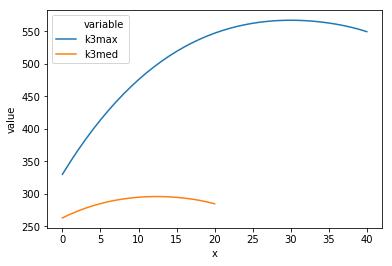

In [90]:
k3_max = 10*(2**2);
x3_max = np.arange(k3_max+1)
w3_max = Wx(k3_max, x3_max, k_4, W_4)
k3_med = k3_max / 2
x3_med = np.arange(k3_med+1)
w3_med = Wx(k3_med, x3_med, k_4, W_4)

melted_plot_df = pd.concat([pd.melt(pd.DataFrame({'x': x3_max,
                                                  'k3max': w3_max}), 
                                                  id_vars=['x'], 
                                                  value_vars=['k3max']),
                            pd.melt(pd.DataFrame({'x': x3_med,
                                                  'k3med': w3_med}), 
                                                  id_vars=['x'], 
                                                  value_vars=['k3med'])], ignore_index=True)
sns.lineplot(data=melted_plot_df, x='x', y='value', hue='variable')
